In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras.backend as K
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from keras.models import load_model
from keras.layers import Dropout

In [173]:
df = pd.read_pickle('wind_dataset_fr_shift1218_5days')
print(df.head())

                  FR        fr        fr        fr        fr        fr  \
DAY                                                                      
2006-01-01  0.040878  0.116344  0.089186  0.054274  0.068600  0.076414   
2006-01-02  0.050066  0.105823  0.116344  0.089186  0.054274  0.068600   
2006-01-03  0.046397  0.051696  0.105823  0.116344  0.089186  0.054274   
2006-01-04  0.061315  0.024062  0.051696  0.105823  0.116344  0.089186   
2006-01-05  0.042258  0.024392  0.024062  0.051696  0.105823  0.116344   

                  fr        fr        fr        fr     ...       \
DAY                                                    ...        
2006-01-01  0.064127  0.047271  0.039511  0.062992     ...        
2006-01-02  0.076414  0.064127  0.047271  0.039511     ...        
2006-01-03  0.068600  0.076414  0.064127  0.047271     ...        
2006-01-04  0.054274  0.068600  0.076414  0.064127     ...        
2006-01-05  0.089186  0.054274  0.068600  0.076414     ...        

           

In [174]:
df.index = pd.to_datetime(df.index)
df.index
df = df.loc["2006-01-03":"2015-12-18"]
all_y = df['FR'].values
all_X = df.drop('FR', axis=1).values
train_df = df.loc["2006-01-03":"2014-12-31"]
test_df = df.loc["2015-01-01":"2015-12-18"]
train_y = train_df['FR'].values
train_X = train_df.drop('FR', axis=1).values
test_y = test_df['FR'].values
text_X = test_df.drop('FR', axis=1).values

X_all = preprocessing.scale(all_X)
X_train = preprocessing.scale(train_X)


X_test = preprocessing.scale(text_X)



In [206]:
ax = pd.DataFrame(X_all).plot\
    (legend='reverse', alpha=1, title="Weather Feathers", \
     kind="line", colormap="prism", figsize=(25, 10), linewidth=1, linestyle=':')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 7})
fig = ax.get_figure()
fig.savefig('X.png') 

In [204]:
df["FR"].plot(title="Power Generation", kind="line", colormap="summer", figsize=(25, 10))
ax = test_df["FR"].plot(title="Power Generation", kind="line", colormap="flag", figsize=(25, 10))
fig = ax.get_figure()
fig.savefig('data.png') 

In [5]:
X_train.shape

(3285, 63)

In [6]:
# Needs to be re-dimensioned for LSTM layer
X_train_w = X_train.reshape(train_X.shape[0], 1, 63)
X_test_w = X_test.reshape(text_X.shape[0], 1, 63)
X_train_w.shape

(3285, 1, 63)

In [136]:
K.clear_session()

in_sh = (1, 63) 
hidden_1= 2000
hidden_2= 2000
hidden_3= 2000
hidden_4= 2000
hidden_5= 2000
hidden_6= 2000
hidden_7= 2000
hidden_8= 2000
hidden_9= 2000
hidden_10= 2000
hidden_11= 2000
hidden_12= 2000
hidden_13= 2000
hidden_14= 2000
hidden_15= 2000
hidden_16= 2000
hidden_17= 2000
hidden_18= 2000
hidden_19= 2000
outputs = 1

model = Sequential()
model.add(LSTM(hidden_1, input_shape = in_sh,))
model.add(Dense(hidden_2, activation = 'relu'))
model.add(Dense(hidden_3, activation = 'relu'))
model.add(Dense(hidden_4, activation = 'relu'))
model.add(Dense(hidden_5, activation = 'relu'))
model.add(Dense(hidden_6, activation = 'relu'))
# model.add(Dropout(0.23))
model.add(Dense(hidden_7, activation = 'relu'))
model.add(Dense(hidden_8, activation = 'relu'))
model.add(Dense(hidden_9, activation = 'relu'))
model.add(Dense(hidden_10, activation = 'relu'))
model.add(Dense(hidden_11, activation = 'relu'))
model.add(Dense(hidden_12, activation = 'relu'))
model.add(Dense(hidden_13, activation = 'relu'))
model.add(Dense(hidden_14, activation = 'relu'))
# model.add(Dense(hidden_15, activation = 'relu'))
# model.add(Dense(hidden_16, activation = 'relu'))
# model.add(Dense(hidden_17, activation = 'relu'))
# model.add(Dense(hidden_18, activation = 'relu'))
# model.add(Dense(hidden_19, activation = 'relu'))
model.add(Dense(outputs))
model.compile(optimizer='adam', loss='mean_squared_error',)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2000)              16512000  
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              4002000   
__________

In [47]:
K.clear_session()

# create model
model = Sequential()

in_dim = 23
hidden_1= 2000
hidden_2= 2000
outputs = 1

model.add(Dense(hidden_1, input_dim=in_dim, activation='relu'))
model.add(Dense(hidden_2, init='uniform', activation='relu'))
model.add(Dense(outputs, init='uniform'))
model.compile(optimizer='adam', loss='binary_crossentropy',)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              22000     
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2001      
Total params: 4,026,001
Trainable params: 4,026,001
Non-trainable params: 0
_________________________________________________________________


D:\Google Drive\projects\wind\venv2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2000, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
D:\Google Drive\projects\wind\venv2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  del sys.path[0]


In [150]:
early_stop = EarlyStopping(monitor = 'loss', patience = 8, verbose = 1)

In [155]:
eps = 500
bs = 1600

history \
    = model.fit(X_train_w, train_y, epochs = eps,\
                batch_size = bs, verbose = 1 , callbacks = [early_stop])

pred_y = model.predict(X_test_w)
explained_variance_score(test_y, pred_y)


Epoch 1/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.4111e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.2246e-04

3285/3285 [==============================] - 1s 207us/step - loss: 1.2209e-04


Epoch 2/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.2857e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.1944e-04

3285/3285 [==============================] - 1s 204us/step - loss: 1.1965e-04


Epoch 3/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.0123e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.0091e-04

3285/3285 [==============================] - 1s 205us/step - loss: 1.0057e-04


Epoch 4/500


1600/3285 [=============>................] - ETA: 0s - loss: 9.9977e-05

3200/3285 [============================>.] - ETA: 0s - loss: 1.0505e-04

3285/3285 [==============================] - 1s 205us/step - loss: 1.0447e-04


Epoch 5/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.1313e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.0470e-04

3285/3285 [==============================] - 1s 206us/step - loss: 1.0384e-04


Epoch 6/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.0188e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.0037e-04

3285/3285 [==============================] - 1s 205us/step - loss: 1.0041e-04


Epoch 7/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.1246e-04

3200/3285 [============================>.] - ETA: 0s - loss: 9.8282e-05

3285/3285 [==============================] - 1s 205us/step - loss: 9.8063e-05


Epoch 8/500


1600/3285 [=============>................] - ETA: 0s - loss: 8.8227e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.6587e-05

3285/3285 [==============================] - 1s 205us/step - loss: 8.6044e-05


Epoch 9/500


1600/3285 [=============>................] - ETA: 0s - loss: 7.8785e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.4767e-05

3285/3285 [==============================] - 1s 206us/step - loss: 8.4215e-05


Epoch 10/500


1600/3285 [=============>................] - ETA: 0s - loss: 8.4797e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.6961e-05

3285/3285 [==============================] - 1s 209us/step - loss: 8.6510e-05


Epoch 11/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.2772e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.1076e-04

3285/3285 [==============================] - 1s 204us/step - loss: 1.0940e-04


Epoch 12/500


1600/3285 [=============>................] - ETA: 0s - loss: 7.8336e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.5068e-05

3285/3285 [==============================] - 1s 205us/step - loss: 8.4903e-05


Epoch 13/500


1600/3285 [=============>................] - ETA: 0s - loss: 9.0336e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.3285e-05

3285/3285 [==============================] - 1s 205us/step - loss: 8.3835e-05


Epoch 14/500


1600/3285 [=============>................] - ETA: 0s - loss: 7.8387e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.1016e-05

3285/3285 [==============================] - 1s 205us/step - loss: 8.1407e-05


Epoch 15/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.0864e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.0324e-04

3285/3285 [==============================] - 1s 204us/step - loss: 1.0278e-04


Epoch 16/500


1600/3285 [=============>................] - ETA: 0s - loss: 9.5677e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.5102e-05

3285/3285 [==============================] - 1s 204us/step - loss: 8.5798e-05


Epoch 17/500


1600/3285 [=============>................] - ETA: 0s - loss: 8.4717e-05

3200/3285 [============================>.] - ETA: 0s - loss: 8.5534e-05

3285/3285 [==============================] - 1s 205us/step - loss: 8.6055e-05


Epoch 18/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.2926e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.1018e-04

3285/3285 [==============================] - 1s 205us/step - loss: 1.0939e-04


Epoch 19/500


1600/3285 [=============>................] - ETA: 0s - loss: 9.4382e-05

3200/3285 [============================>.] - ETA: 0s - loss: 9.4123e-05

3285/3285 [==============================] - 1s 207us/step - loss: 9.3730e-05


Epoch 20/500


1600/3285 [=============>................] - ETA: 0s - loss: 1.2782e-04

3200/3285 [============================>.] - ETA: 0s - loss: 1.0661e-04

3285/3285 [==============================] - 1s 205us/step - loss: 1.0617e-04


Epoch 21/500


1600/3285 [=============>................] - ETA: 0s - loss: 9.6467e-05

3200/3285 [============================>.] - ETA: 0s - loss: 9.7614e-05

3285/3285 [==============================] - 1s 206us/step - loss: 9.7061e-05


Epoch 22/500


1600/3285 [=============>................] - ETA: 0s - loss: 8.7419e-05

3200/3285 [============================>.] - ETA: 0s - loss: 9.1983e-05

3285/3285 [==============================] - 1s 205us/step - loss: 9.3173e-05


Epoch 00022: early stopping


0.94439404099728141

In [372]:
eps = 500
bs = 10


model.fit(X_train, train_y, epochs = eps, batch_size = bs, verbose = 1 , callbacks = [early_stop])
pred_y = model.predict(X_test_w)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (3287, 10)

In [117]:
pred_y = model.predict(X_test_w)
# evaluate the model


In [26]:
pred_y = model.predict(X_test)
# evaluate the model

ValueError: Error when checking : expected lstm_1_input to have 3 dimensions, but got array with shape (365, 10)

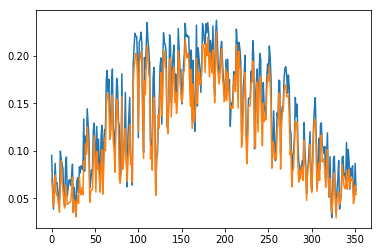

In [122]:
# pred_y = model.predict(X_test)
plt.plot(test_y)
plt.plot(pred_y)

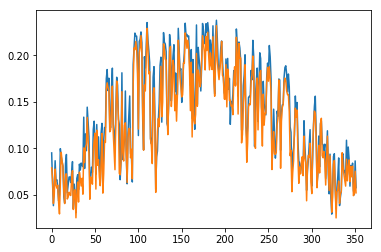

In [733]:
# pred_y = model.predict(X_test)
plt.plot(test_y)
plt.plot(pred_y)

In [347]:
explained_variance_score(test_y, pred_y)

0.96511292898463441

In [355]:
import h5py

model.save('my_model_9651.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

ImportError: `save_model` requires h5py.

In [357]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


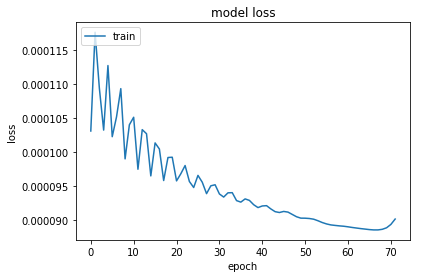

In [446]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
explained_variance_score(test_y, pred_y)

0.96526428147072219

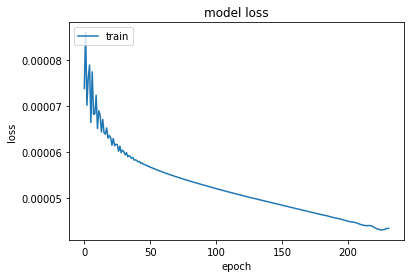

In [669]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
# pred_y = model.predict(X_test)
plt.figure(figsize=(25,8))
plt.plot(test_y, color='cyan', linewidth=4)
plt.plot(pred_y, color='red', linewidth=4, linestyle='dashed')

plt.savefig('foo2.png')
plt.show()

In [668]:
explained_variance_score(test_y, pred_y)

0.96425709288297989

In [115]:
explained_variance_score(test_y, pred_y)

0.95715278674389404

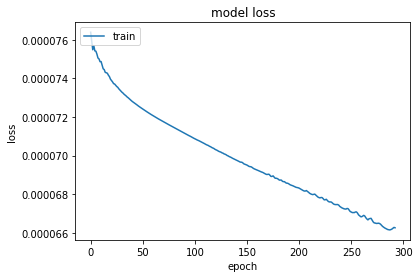

In [495]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

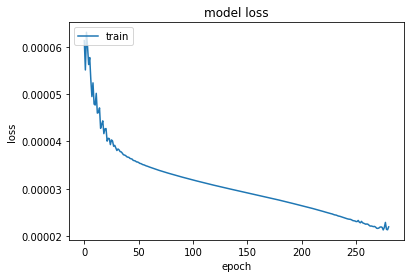

In [688]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [671]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

ImportError: `save_weights` requires h5py.

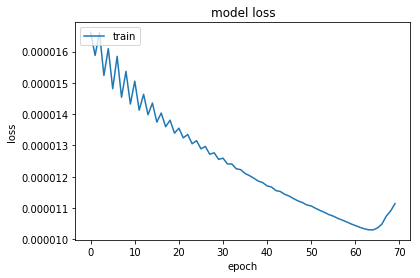

In [719]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

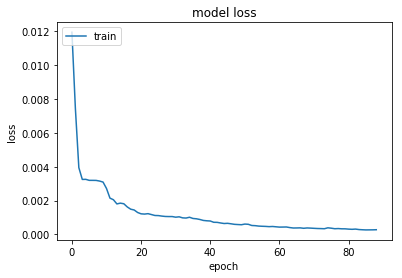

In [70]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()